
Import of librares or funcionalities that we gona use.

In [ ]:
import os
import sys
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
from pandas import read_table, read_csv

This collaboratory notebook is runing in a virtual machine. Then, if for any reason we lost the connection, is necessary re-import all librares and reinstall all packages again. The next cell is used to connect to kaggle and get the dataset.

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"goersch","key":"d3e8d231c86efd47353a8522e56eae9b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-10-29 12:28:54          14827  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8834  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3988  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3293  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
! kaggle competitions download -c madsad-i


train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -o test.csv.zip
!unzip -o train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
df_tr = read_csv("train.csv", sep=",")
type(df_tr)
# get the the first 5 rows of the table
df_tr.head()
# name of the columns
df_tr.columns
# quick description of the data
df_tr.info()
# for the outcome verufy the number of classes
df_tr["y"].value_counts()
# Summary of the numerical attributes
df_tr.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832 entries, 0 to 5831
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   i       5832 non-null   int64  
 1   y       5832 non-null   int64  
 2   x1      5832 non-null   float64
 3   x2      5832 non-null   float64
 4   x3      5828 non-null   float64
 5   x4      5824 non-null   float64
 6   x5      5828 non-null   float64
 7   x6      5824 non-null   float64
 8   x7      5829 non-null   float64
 9   x8      5830 non-null   float64
 10  x9      5740 non-null   float64
 11  x10     5728 non-null   float64
 12  x11     5831 non-null   float64
 13  x12     5829 non-null   float64
 14  x13     3669 non-null   float64
 15  x14     3681 non-null   float64
 16  x15     4776 non-null   float64
 17  x16     4766 non-null   float64
 18  x17     4199 non-null   float64
 19  x18     4189 non-null   float64
 20  x19     5831 non-null   float64
 21  x20     5832 non-null   float64
 22  

,i,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,o1,o2
count,5832.000000,5832.000000,5832.000000,5832.000000,5828.000000,5824.000000,5828.000000,5824.000000,5829.000000,5830.000000,5740.000000,5728.000000,5831.000000,5829.000000,3669.000000,3681.000000,4776.000000,4766.000000,4199.000000,4189.000000,5831.000000,5832.000000,5442.000000,5454.000000,5410.000000,5419.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.00000,5832.000000,5832.000000,5832.000000,5832.000000,5807.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000
mean,5837.652949,0.356481,0.012788,0.013650,0.021443,0.021007,0.029248,0.028652,0.012141,0.010167,0.011334,0.013762,0.033796,0.030309,0.020839,0.016429,0.081871,0.077345,0.013464,0.017386,0.018448,0.019702,0.042785,0.043170,0.042988,0.042211,0.013774,0.010467,0.016471,0.017565,0.018368,0.012275,0.026313,0.01962,0.085159,0.584409,0.726413,0.208129,-4.173895,0.983270,0.994196,0.033992,5320.831962,531.864026,52.891289,20.813786,22.022977,2.012689,7.192730,0.000514,20.444787,22.091564,2.022462,7.216049,22.377229,14.001200
std,3346.046459,0.479001,0.450840,0.466789,0.916463,0.917759,1.233137,1.235146,0.482383,0.450497,0.468664,0.519346,0.886308,0.836766,0.630551,0.581071,1.308704,1.304542,0.547442,0.653409,1.082577,1.120903,0.933981,0.904762,0.928510,0.957102,0.521793,0.444568,0.503801,0.546671,0.459839,0.339616,1.158994,0.85992,1.100810,3.408172,4.245658,1.355627,1.202239,0.103397,0.061193,0.234900,2175.674813,217.588016,21.794416,2.615658,0.216345,0.111936,1.427333,0.022677,1.812806,0.627925,0.169769,1.416744,0.994074,4.609814
min,2.000000,0.000000,-0.033200,-0.035700,-0.025900,-0.027400,-0.031700,-0.033900,-6.370500,-6.042600,-0.027200,-0.030200,-0.041700,-0.040700,-0.037400,-0.035500,-0.076500,-0.075900,-12.443100,-6.741700,-22.346200,-12.455900,-0.087700,-0.091600,-0.093000,-0.094400,-0.019100,-0.017300,-0.010900,-0.010500,-0.019600,-0.017100,-0.016900,-0.01330,-3.129900,-15.342200,-29.250400,-13.991200,-6.917700,0.005500,0.002700,0.000000,111.000000,11.000000,1.000000,20.000000,22.000000,2.000000,2.000000,0.000000,20.000000,22.000000,1.000000,2.000000,22.000000,6.000000
25%,2939.750000,0.000000,-0.030000,-0.031600,-0.025900,-0.027400,-0.031700,-0.033900,-0.031200,-0.030600,-0.026300,-0.028900,-0.040800,-0.039700,-0.036900,-0.035000,-0.071300,-0.070700,-0.036200,-0.035100,-0.028100,-0.029600,-0.075600,-0.079600,-0.080200,-0.082000,-0.019100,-0.017300,-0.010900,-0.010500,-0.019600,-0.017100,-0.016900,-0.01330,-0.174400,-0.021900,-0.008500,0.102700,-4.971800,1.000000,1.000000,0.000000,4483.000000,448.000000,44.500000,20.000000,22.000000,2.000000,6.000000,0.000000,20.000000,22.000000,2.000000,6.000000,22.000000,10.000000
50%,5848.500000,0.000000,-0.028000,-0.029400,-0.025300,-0.026700,-0.030800,-0.032800,-0.029700,-0.028900,-0.024500,-0.026800,-0.037400,-0.036400,-0.034700,-0.033100,-0.061900,-0.061100,-0.033800,-0.032500,-0.026300,-0.027800,-0.063600,-0.067600,-0.066100,-0.067700,-0.019100,-0.017300,-0.010900,-0.010500,-0.019600,-0.017100,-0.016900,-0.01330,-0.174400,-0.021900,-0.008500,0.102700,-3.973300,1.000000,1.000000,0.000000,4791.000000,479.000000,47.000000,20.000000,22.000000,2.000000,8.000000,0.000000,20.000000,22.000000,2.000000,8.000000,22.000000,14.000000
75%,8696.250000,1.000000,-0.021100,-0.021800,-0.021100,-0.022000,-0.024800,-0.026100,-0.023200,-0.022200,-0.018200,-0.019500,-0.025850,-0.025600,-0.026800,-0.025400,-0.033275,-0.034125,-0.023600,-0.020800,-0.019400,-0.020700,-0.027500,-0.031500,-0.024900,-0.027200,-0.019100,-0.017300,-0.010900,-0.010500,-0.019600,-0.017100,-0.016900,-0.01330,-0.174400,-0.021900,-0.008500,0.102700,-3.306800,1.000000,1.0000

In [ ]:
df_te = read_csv("test.csv", sep=",")
type(df_te)
# get the the first 5 rows of the table
df_te.head()
# name of the columns
df_te.columns
# quick description of the data
df_te.info()
# for the outcome verufy the number of classes
#df_te["y"].value_counts()
# Summary of the numerical attributes
df_te.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   i       5834 non-null   int64  
 1   y       0 non-null      float64
 2   x1      5834 non-null   float64
 3   x2      5834 non-null   float64
 4   x3      5832 non-null   float64
 5   x4      5824 non-null   float64
 6   x5      5832 non-null   float64
 7   x6      5824 non-null   float64
 8   x7      5833 non-null   float64
 9   x8      5832 non-null   float64
 10  x9      5726 non-null   float64
 11  x10     5727 non-null   float64
 12  x11     5834 non-null   float64
 13  x12     5833 non-null   float64
 14  x13     3648 non-null   float64
 15  x14     3678 non-null   float64
 16  x15     4763 non-null   float64
 17  x16     4747 non-null   float64
 18  x17     4225 non-null   float64
 19  x18     4199 non-null   float64
 20  x19     5834 non-null   float64
 21  x20     5834 non-null   float64
 22  

,i,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,o1,o2
count,5834.000000,0.0,5834.000000,5834.000000,5832.000000,5824.000000,5832.000000,5824.000000,5833.000000,5832.000000,5726.000000,5727.000000,5834.000000,5833.000000,3648.000000,3678.000000,4763.000000,4747.000000,4225.000000,4199.000000,5834.000000,5834.000000,5462.000000,5450.000000,5429.000000,5403.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5819.000000,5834.000000,5834.000000,5831.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000
mean,5829.348474,NaN,0.017007,0.018838,0.010084,0.010008,0.015763,0.016434,0.015257,0.014162,0.015742,0.019053,0.053310,0.051511,0.049154,0.046468,0.076212,0.074197,0.054652,0.080331,0.014522,0.032291,0.049409,0.041209,0.041269,0.043162,0.042962,0.040892,0.028915,0.021563,0.058679,0.055323,0.045552,0.020265,0.122513,0.677425,0.831638,0.248157,-4.188898,0.980853,0.994993,0.035028,5349.009599,534.675866,53.169523,20.832705,22.028111,2.013027,7.163867,0.000857,20.452520,22.081591,2.018684,7.188550,22.394241,13.972403
std,3389.744824,NaN,0.448729,0.493303,0.561386,0.621059,0.871271,0.966347,0.602819,0.563927,0.411628,0.496764,1.625017,1.643487,1.644568,1.621319,1.319621,1.282372,1.849544,2.506078,1.155349,1.071972,1.124134,0.744684,0.714126,0.763642,1.755179,1.807275,1.082859,0.603516,2.880173,2.670870,1.989582,0.546926,1.182485,3.674075,4.535962,1.352643,1.219702,0.112538,0.056829,0.229459,2211.358577,221.153539,22.148074,2.639254,0.246835,0.113400,1.454572,0.029265,1.844892,0.577473,0.147534,1.441623,1.016008,4.641116
min,1.000000,NaN,-0.036600,-0.040500,-0.025900,-0.027400,-0.031700,-0.033900,-5.224200,-4.424800,-0.042900,-0.050200,-0.041700,-0.040700,-0.037400,-0.035500,-0.076500,-0.075900,-4.309400,-7.185200,-54.389600,-6.034700,-0.087700,-0.091600,-0.093000,-0.094400,-0.019100,-0.017300,-0.010900,-0.010500,-0.019600,-0.017100,-0.016900,-0.013300,-3.129900,-19.235100,-38.944700,-12.787600,-6.917700,0.005500,0.087900,0.000000,111.000000,11.000000,1.000000,20.000000,22.000000,2.000000,2.000000,0.000000,20.000000,22.000000,1.000000,2.000000,22.000000,6.000000
25%,2893.250000,NaN,-0.030000,-0.031600,-0.025900,-0.027400,-0.031700,-0.033900,-0.031200,-0.030500,-0.026300,-0.028900,-0.040700,-0.039700,-0.036900,-0.035100,-0.071000,-0.070100,-0.036200,-0.035000,-0.028100,-0.029600,-0.075600,-0.079600,-0.080600,-0.081800,-0.019100,-0.017300,-0.010900,-0.010500,-0.019600,-0.017100,-0.016900,-0.013300,-0.174400,-0.021900,-0.008500,0.102700,-4.971800,1.000000,1.000000,0.000000,4511.000000,451.000000,45.000000,20.000000,22.000000,2.000000,6.000000,0.000000,20.000000,22.000000,2.000000,6.000000,22.000000,10.000000
50%,5821.000000,NaN,-0.028200,-0.029500,-0.025300,-0.026700,-0.030900,-0.032900,-0.029700,-0.028800,-0.024700,-0.027000,-0.037200,-0.036400,-0.034900,-0.033100,-0.061300,-0.060600,-0.033800,-0.032600,-0.026300,-0.027700,-0.063600,-0.067600,-0.065400,-0.067500,-0.019100,-0.017300,-0.010900,-0.010500,-0.019600,-0.017100,-0.016900,-0.013300,-0.174400,-0.021900,-0.008500,0.102700,-3.973300,1.000000,1.000000,0.000000,4932.000000,493.000000,49.000000,20.000000,22.000000,2.000000,8.000000,0.000000,20.000000,22.000000,2.000000,8.000000,22.000000,14.000000
75%,8793.750000,NaN,-0.021325,-0.022200,-0.021300,-0.022100,-0.025200,-0.026300,-0.023400,-0.022900,-0.018900,-0.020100,-0.025900,-0.024800,-0.026800,-0.025600,-0.032000,-0.030950,-0.023100,-0.021200,-0.019700,-0.020900,-0.027500,-0.019500,-0.024800,-0.025300,-0.019100,-0.017300,-0.010900,-0.010500,-0.019600,-0.017100,-0.016900,-0.013300,-0.174400,-0.021900,-0.008500,0.102700,-3.306800,1.000000,1.000000,0.000000,6920.000000,692.00000

In [ ]:
#df.info()
colunas = list(df_te.columns.values)
colunas.remove('y')
colunas.remove('i')
for atributo in colunas:
  if df_te[atributo].isnull().values.any():
    print(atributo)
    df_te[atributo].fillna(0, inplace=True)

x3
x4
x5
x6
x7
x8
x9
x10
x12
x13
x14
x15
x16
x17
x18
x21
x22
x23
x24
x37
x40


Uma vez que as features C e O já estão em formatio numéricos, apenas vamos normalizar o valor destas colunas.

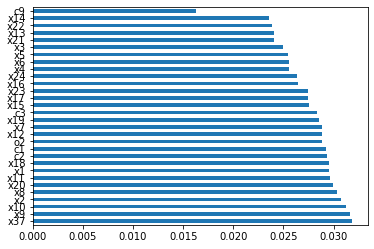

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing

SEED = 123
test_size = 0.2
Strat=True
K=30

colunas = list(df_tr.columns.values)
colunas.remove('i')
Y=df_tr['y']
colunas.remove('y')

for c in colunas:
  df_tr[c].fillna((df_tr[c].mean()), inplace=True)

X=df_tr[colunas]

# Selecionar as features
model = ExtraTreesClassifier(random_state=1)
model.fit(X,Y)
#print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(K).plot(kind='barh')
plt.show()

relevant_features = list(feat_importances.nlargest(K).index.array)
X_filtered = X[relevant_features]

# Normalizar todas as features
min_max_scaler = preprocessing.MinMaxScaler()
X_Scaled = min_max_scaler.fit_transform(X_filtered)

if Strat:
  X_train, X_test, y_train, y_test = train_test_split(X_Scaled, Y, test_size=test_size, random_state = SEED, stratify=Y)
else:
  X_train, X_test, y_train, y_test = train_test_split(X_Scaled, Y, test_size=test_size, random_state = SEED)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [ ]:
clf1 = SGDClassifier(loss="log", penalty="l2", random_state=1)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = GaussianNB()
clf4 = KNeighborsClassifier(n_neighbors = 7)
clf5 = SGDClassifier(loss="hinge", penalty="l2", random_state=1)
clf6 = MLPClassifier(activation='relu', solver='adam', alpha=1e-5,
                     hidden_layer_sizes=(15, ), learning_rate='adaptive',
                     max_iter=300, random_state=1)
clf7 = tree.DecisionTreeClassifier(criterion='gini', max_features='auto', random_state=1)
clf8 = GradientBoostingClassifier(n_estimators=100, random_state=1)

eclf = VotingClassifier(estimators=[('lr',clf1), ('knn', clf4), ('gnb',clf3), ('ann', clf6)], voting='soft')

In [ ]:
clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
clf4 = clf4.fit(X_train, y_train)
clf5 = clf5.fit(X_train, y_train)
clf6 = clf6.fit(X_train, y_train)
clf7 = clf7.fit(X_train, y_train)
clf8 = clf8.fit(X_train, y_train)

eclf = eclf.fit(X_train, y_train)

In [ ]:
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, eclf], ['LR', 'RF', 'GNB', 'KNN(7)', 'SVM', 'ANN', 'DT', 'GBC', 'Ensemble']):
      scores = cross_val_score(clf, X_Scaled, Y, scoring='accuracy', cv=5)
      print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.6716 (+/- 0.0147) [LR]
Accuracy: 0.6610 (+/- 0.0151) [RF]
Accuracy: 0.6670 (+/- 0.0153) [GNB]
Accuracy: 0.5581 (+/- 0.0682) [KNN(7)]
Accuracy: 0.6716 (+/- 0.0127) [SVM]
Accuracy: 0.6768 (+/- 0.0090) [ANN]
Accuracy: 0.5811 (+/- 0.0198) [DT]
Accuracy: 0.6048 (+/- 0.1179) [GBC]
Accuracy: 0.6814 (+/- 0.0101) [Ensemble]
